<a href="https://colab.research.google.com/github/TomPhanAnh/FPT-Data-Science/blob/DSP303x_Machine-Learning/DSP303x_ASM2_anhpt12081_funix_edu_vn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
%matplotlib inline

# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [ ]:
#TO DO:
data = pd.read_csv('pima-indians-diabetes.csv', 
                   header = None, 
                   names = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"])

In [ ]:
data.head()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [ ]:
#TO DO:
# Number of times pregnant
# Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# Diastolic blood pressure (mm Hg)
# Triceps skinfold thickness (mm)
# 2-Hour serum insulin (mu U/ml)
# Body mass index (weight in kg/(height in m)^2)
# Diabetes pedigree function
# Age (years)
print("Shape of Data: {}".format(data.shape))
data.describe()

Shape of Data: (768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NumTimesPrg    768 non-null    int64  
 1   PlGlcConc      768 non-null    int64  
 2   BloodP         768 non-null    int64  
 3   SkinThick      768 non-null    int64  
 4   TwoHourSerIns  768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DiPedFunc      768 non-null    float64
 7   Age            768 non-null    int64  
 8   HasDiabetes    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.isnull().any()

NumTimesPrg      False
PlGlcConc        False
BloodP           False
SkinThick        False
TwoHourSerIns    False
BMI              False
DiPedFunc        False
Age              False
HasDiabetes      False
dtype: bool

# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [ ]:
#TO DO:
data.corr()

,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### 4. Render the corr matrix using the heatmap in seaborn.

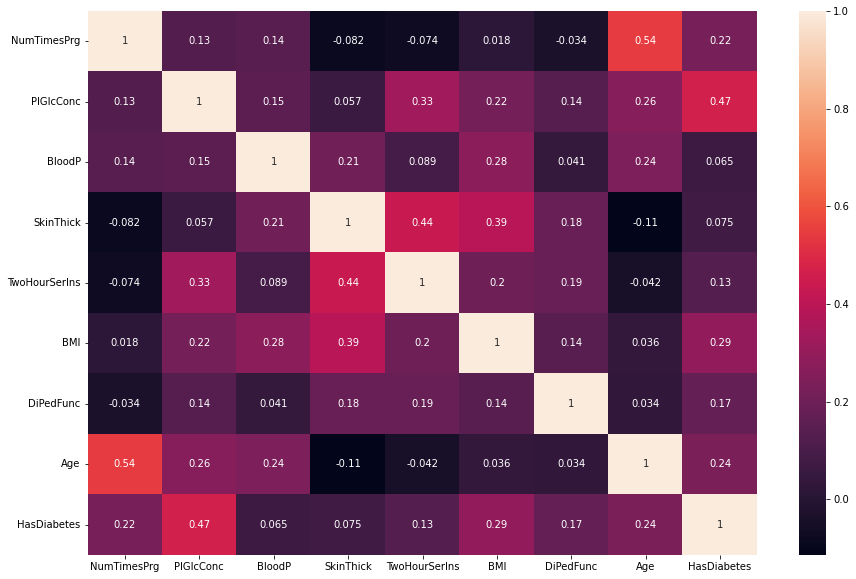

In [ ]:
#TO DO:
%matplotlib inline
import seaborn as sns
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)


### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [ ]:
data.corr()['HasDiabetes'].sort_values(ascending = False).keys()[1]

'PlGlcConc'

## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

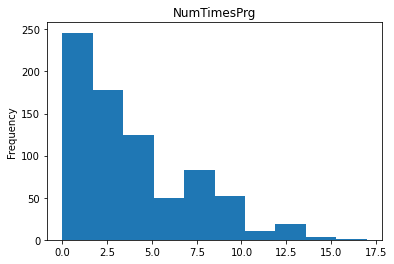

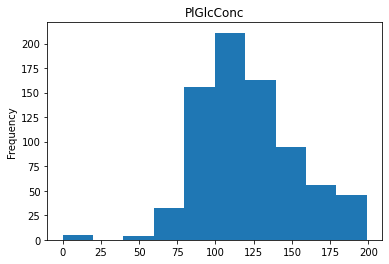

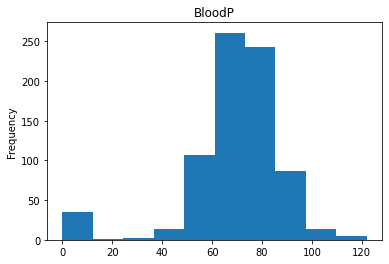

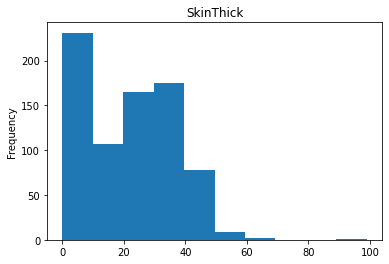

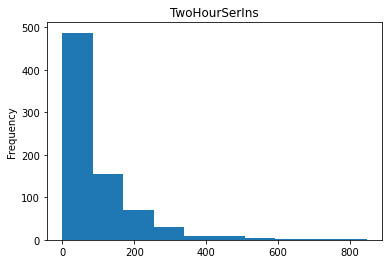

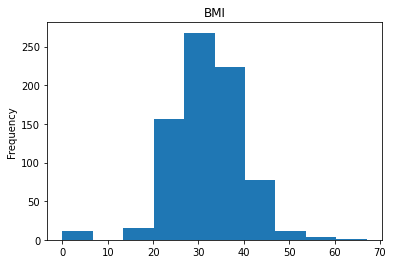

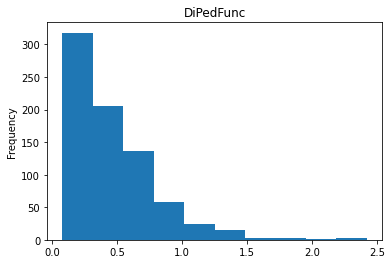

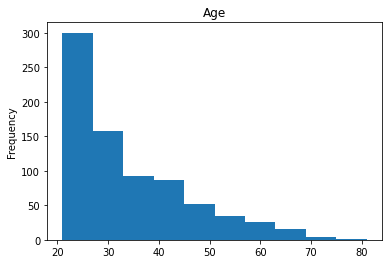

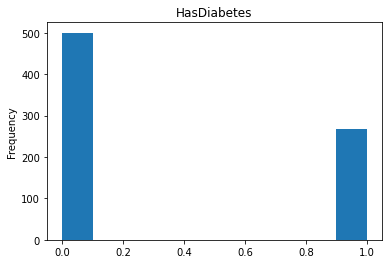

In [ ]:
#TO DO:
for i in data.columns:
  col = data[i]
  plt.figure() #Pull the figure so they plot on separate graphs
  col.plot.hist(title = i, rot = 0) #Plot the column

An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

In [ ]:
#TO DO:
for i in data.columns:
  data[data[i].isnull()]  = data[i].mean()

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [ ]:
#TO DO:
x = data.drop('HasDiabetes', axis = 1)
y = data['HasDiabetes']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [ ]:
#TO DO:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 7, stratify = y)

# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

### TO DO:


### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [ ]:
#TO DO:
print("The proportion of positive/total women in full dataset: {}".format(round(len(y[y == 1])/len(y),3)))
print("The proportion of positive/total women in training: {}".format(round(len(y_train[y_train == 1])/len(y_train),3)))
print("The proportion of positive/total women in test: {}".format(round(len(y_test[y_test == 1])/len(y_test),3)))

The proportion of positive/total women in full dataset: 0.349
The proportion of positive/total women in training: 0.349
The proportion of positive/total women in test: 0.351


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#TO DO:
k_range = list(range(1,21))
param_grid = {"n_neighbors": k_range,
              "weights":["uniform", "distance"],
              "leaf_size": list(range(10,21)),
              'p':[1,2]
              
              }
grid = GridSearchCV(knn, 
                    param_grid, 
                    cv = 10, 
                    scoring = 'accuracy',
                     return_train_score=True,verbose=1)
grid_search_knn=grid.fit(x_train, y_train)

Fitting 10 folds for each of 880 candidates, totalling 8800 fits


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

In [ ]:
print(grid_search_knn.best_params_)

{'leaf_size': 10, 'n_neighbors': 19, 'p': 2, 'weights': 'distance'}


In [ ]:
# TO DO
print("Mô hình đạt hiệu quả, độ chính xác cao nhất khi:")
print("\n - Số lá: {}".format(grid_search_knn.best_estimator_.leaf_size))
print("\n - Số điểm kề: {}".format(grid_search_knn.best_estimator_.n_neighbors))
print("\n - Phương pháp dự đoan: {}".format(grid_search_knn.best_estimator_.weights))
print("\n - Phương pháp tinh toán: {}".format(grid_search_knn.best_estimator_.p))

Mô hình đạt hiệu quả, độ chính xác cao nhất khi:

 - Số lá: 10

 - Số điểm kề: 19

 - Phương pháp dự đoan: distance

 - Phương pháp tinh toán: 2


### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
#TO DO:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors =  21)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test).astype('int64')
print("F1_score là: {}".format(roundf1_score(y_test, y_pred)))
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))


F1_score là: 0.6250000000000001
Accuracy Score là: 0.7662337662337663


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#TO DO:
model = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features':['auto','sqrt','log2'],
              'ccp_alpha':[0.1,0.01,0.001],
              'max_depth': [5,6,7,8],
              'min_samples_leaf': [4,6,8,10],
              'splitter':["best", "random"],
              'criterion':['gini','entrophy']}
grid_search_dt = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=True)
grid_search_dt.fit(x_train, y_train)           

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'entrophy'

  warnings.warn(some_fits_faile

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entrophy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 6, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=True)

In [ ]:
dtc = DecisionTreeClassifier(ccp_alpha=0.01, max_depth= 7
                             ,min_samples_leaf= 10, max_features='log2')
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
print("F1_score là: {}".format(f1_score(y_test, y_pred, average = 'micro')))
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

F1_score là: 0.7662337662337663
Accuracy Score là: 0.7662337662337663


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [ ]:
#TO DO:
grid_search_dt.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=6, max_features='log2',
                       min_samples_leaf=10)

In [ ]:
print("Mô hình đạt hiệu quả, độ chính xác cao nhất khi:")
print("\n - Mức độ phức tạp : {}".format(grid_search_dt.best_estimator_.ccp_alpha))
print("\n - Độ sâu mô hình tối đa: {}".format(grid_search_dt.best_estimator_.max_depth))
print("\n - Tính năng - Chuyển đổi dữ liệu (max_features): {}".format(grid_search_dt.best_estimator_.max_features))
print("\n - Số lá (mẫu) tối thiểu: {}".format(grid_search_dt.best_estimator_.min_samples_leaf))

Mô hình đạt hiệu quả, độ chính xác cao nhất khi:

 - Mức độ phức tạp : 0.001

 - Độ sâu mô hình tối đa: 6

 - Tính năng - Chuyển đổi dữ liệu (max_features): log2

 - Số lá (mẫu) tối thiểu: 10


# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000,10000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,.00001],
              'kernel': ['rbf']}
grid_svc = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid_svc.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.656 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.772 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.699 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.730 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.650 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000, 10000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid_svc.best_estimator_

SVC(C=1000, gamma=0.001)

In [ ]:
svc = SVC(C=1000, gamma=0.001)

In [ ]:
#TO DO:
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print("F1_score là: {}".format(f1_score(y_test, y_pred, average = 'micro')))
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

F1_score là: 0.7727272727272727
Accuracy Score là: 0.7727272727272727


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

### TO DO:


In [ ]:
#TO DO:
grid_svc.best_estimator_

SVC(C=1000, gamma=0.001)

In [ ]:
print("Mô hình đạt hiệu quả, độ chính xác cao nhất khi:")
print("\n - Tham số kiểm soát : {}".format(grid_svc.best_estimator_.C))
print("\n - Độ ảnh hưởng gamma: {}".format(grid_svc.best_estimator_.gamma))

Mô hình đạt hiệu quả, độ chính xác cao nhất khi:

 - Tham số kiểm soát : 1000

 - Độ ảnh hưởng gamma: 0.001


# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [ ]:
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"],"max_iter":[100,200]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'max_iter': [100, 200], 'penalty': ['l1', 'l2']})

In [ ]:
logreg_cv.best_estimator_

LogisticRegression(C=0.1)

In [ ]:
#TO DO:
logreg=LogisticRegression(C=0.1)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print("F1_score là: {}".format(f1_score(y_test, y_pred, average = 'micro')))
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))


F1_score là: 0.7727272727272727
Accuracy Score là: 0.7727272727272727


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

In [ ]:
#TO DO
print("Mô hình đạt hiệu quả, độ chính xác cao nhất khi:")
print("\n - Tham số kiểm soát : {}".format(logreg_cv.best_estimator_.C))


Mô hình đạt hiệu quả, độ chính xác cao nhất khi:

 - Tham số kiểm soát : 0.1


### TO DO:
Mô hình đạt hiệu quả, độ chính xác cao nhất khi:
- Mức độ kiểm soát (Regularization: C) = 0.1


# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [ ]:
#TO DO:
#create a dictionary of our models
from sklearn.ensemble import VotingClassifier
md1 = KNeighborsClassifier(n_neighbors =  21)
md2 = DecisionTreeClassifier(ccp_alpha=0.01, max_depth=7, max_features='log2',
                       min_samples_leaf=10)
md3 = SVC(C=1000, gamma=0.001)
md4 = LogisticRegression(C=0.1)

#create our voting classifier, inputting our models
eclf1 = VotingClassifier(estimators=[('md1',md1),('md2',md2), ('md3',md3),('md4',md4)], weights = [1,0.5,2,1]).fit(x_train, y_train)

### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [ ]:
#TO DO:
y_pred = eclf1.predict(x_test)
print("F1_score là: {}".format(f1_score(y_test, y_pred)))
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

F1_score là: 0.6597938144329897
Accuracy Score là: 0.7857142857142857


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [ ]:
#TO DO:
#create a dictionary of our models
from sklearn.ensemble import VotingClassifier
md1 = KNeighborsClassifier()
md2 = DecisionTreeClassifier()
md3 = SVC()
md4 = LogisticRegression()

#create our voting classifier, inputting our models
eclf2 = VotingClassifier(estimators=[('lr', md1),('lr2', md2),('rf', md3), ('gnb', md4)], voting = 'hard', weights = [3,1,1,1]).fit(x_train, y_train)

In [ ]:
#TO DO:
#TO DO:
y_pred = eclf2.predict(x_test)
print("F1_score là: {}".format(f1_score(y_test, y_pred, average = 'micro')))
print("Accuracy Score là: {}".format(accuracy_score(y_test, y_pred)))

F1_score là: 0.7597402597402597
Accuracy Score là: 0.7597402597402597


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [ ]:
#TO DO:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': f1_score(y_train,knn.predict(x_train)), 
                        'DT': f1_score(y_train,dtc.predict(x_train)), 
                        'SVM': f1_score(y_train,svc.predict(x_train)), 
                        'LR': f1_score(y_train,logreg.predict(x_train))
                      , 'EN_HARD': f1_score(y_train,eclf1.predict(x_train)),   
                        'EN_SOFT': f1_score(y_train,eclf2.predict(x_train))},
             'test':{'KNN': f1_score(y_test,knn.predict(x_test)), 
                     'DT': f1_score(y_test,dtc.predict(x_test)), 
                     'SVM': f1_score(y_test,svc.predict(x_test)), 
                     'LR': f1_score(y_test, logreg.predict(x_test)), 
                     'EN_HARD': f1_score(y_test, eclf1.predict(x_test)), 
                     'EN_SOFT': f1_score(y_test, eclf2.predict(x_test))}}

accuracy_scores = {'train':{'KNN': accuracy_score(y_train,knn.predict(x_train)), 
                        'DT': accuracy_score(y_train,dtc.predict(x_train)), 
                        'SVM': accuracy_score(y_train,svc.predict(x_train)), 
                        'LR': accuracy_score(y_train,logreg.predict(x_train))
                      , 'EN_HARD': accuracy_score(y_train,eclf1.predict(x_train)),   
                        'EN_SOFT': accuracy_score(y_train,eclf2.predict(x_train))}, 
                  'test':{'KNN': accuracy_score(y_test,knn.predict(x_test)), 
                     'DT': accuracy_score(y_test,dtc.predict(x_test)), 
                     'SVM': accuracy_score(y_test,svc.predict(x_test)), 
                     'LR': accuracy_score(y_test, logreg.predict(x_test)), 
                     'EN_HARD': accuracy_score(y_test, eclf1.predict(x_test)), 
                     'EN_SOFT': accuracy_score(y_test, eclf2.predict(x_test))}}


In [ ]:
result = pd.DataFrame({"Accuracy Training":accuracy_scores['train'],"f1_score Training":f1_scores['train'],
              "Accuracy Testing":accuracy_scores['test'],"f1_score Testing":f1_scores['test']})
result.rename(index = {'DT':'Decision Tree',
                       'LR':'Logistic Regression','EN_HARD':'Hard Voting','EN_SOFT':'Soft Voting'})

,Accuracy Training,f1_score Training,Accuracy Testing,f1_score Testing
KNN,0.778502,0.622222,0.766234,0.625000
Decision Tree,0.767101,0.678652,0.766234,0.666667
SVM,0.791531,0.654054,0.772727,0.639175
Logistic Regression,0.775244,0.631016,0.772727,0.631579
Hard Voting,0.794788,0.655738,0.785714,0.659794
Soft Voting,0.846906,0.755208,0.759740,0.584270


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:
